# Regression Modeling in Practice, exercise 3: Multiple Regression

## Dataset: Bike sharing

I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. I will test how the number of bikes rent is associated with the explanatory variables regarding the weather. Note: since the felt temperature (atemp) is highly correlated with the temperature (temp) I will not take atemp into consideration in my analysis. In an earlier analysis I've shown that the number of bikes rent is positively associated with temperature.

In [62]:
%matplotlib inline
import numpy
import pandas
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn
import matplotlib.pyplot as plt


data = pandas.read_csv('day.csv', low_memory=False)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
data['temp_c']=data['temp']-numpy.mean(data['temp'])
print("centered temp mean: ",numpy.mean(data['temp_c']))
data['windspeed_c']=data['windspeed']-numpy.mean(data['windspeed'])
print("centered windspeed: ",numpy.mean(data['windspeed_c']))
data['hum_c']=data['hum']-numpy.mean(data['hum'])
print("centered humidity: ",numpy.mean(data['hum_c']))
data['weathersit_c']=data['weathersit']-1
print("weather situation frequencies: \n",data['weathersit'].value_counts())
print("centered weather situation frequencies: \n",data['weathersit_c'].value_counts())

centered temp mean:  5.429613287325492e-17
centered windspeed:  1.7811409741848868e-16
centered humidity:  4.1242279389461186e-16
weather situation frequencies: 
 1    463
2    247
3     21
Name: weathersit, dtype: int64
centered weather situation frequencies: 
 0    463
1    247
2     21
Name: weathersit_c, dtype: int64


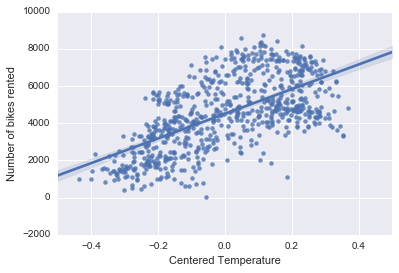

In [64]:
plot1=seaborn.regplot(x="temp_c", y="cnt", fit_reg=True, data=data)
plt.xlabel('Centered Temperature')
plt.ylabel('Number of bikes rented');

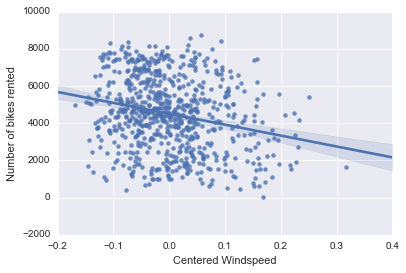

In [65]:
plot1=seaborn.regplot(x="windspeed_c", y="cnt", fit_reg=True, data=data)
plt.xlabel('Centered Windspeed')
plt.ylabel('Number of bikes rented');

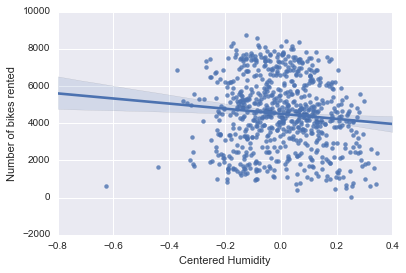

In [66]:
plot1=seaborn.regplot(x="hum_c", y="cnt", fit_reg=True, data=data)
plt.xlabel('Centered Humidity')
plt.ylabel('Number of bikes rented');

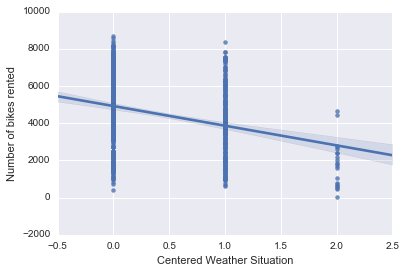

In [67]:
plot1=seaborn.regplot(x="weathersit_c", y="cnt", fit_reg=True, data=data)
plt.xlabel('Centered Weather Situation')
plt.ylabel('Number of bikes rented');

In [68]:
model = smf.ols(formula='cnt ~ temp_c + windspeed_c + hum_c + weathersit_c', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sat, 14 May 2016   Prob (F-statistic):           4.25e-99
Time:                        19:14:57   Log-Likelihood:                -6336.4
No. Observations:                 731   AIC:                         1.268e+04
Df Residuals:                     726   BIC:                         1.271e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     4696.0037     72.043     65.184   

## Summary of the model
All weather variables are associated with the number of bikes rent (p<0.001). The number of bikes rent is positively associated with the temperature and negatively with wind speed, humidity and weather situation (higher weather situation numbers indicate 'worse' weather). The fitted model is:

cnt = 4696.0037 + 6371.0061 \* temp_c - 4210.8393 \* windspeed_c - 1881.8375 \* hum_c - 484.7741 \* weathersit_c  

The hypothesis that the number of bikes rent is associated with temperature is supported (p<0.001). There is no evidence for confounding.

# Evaluating the model fit

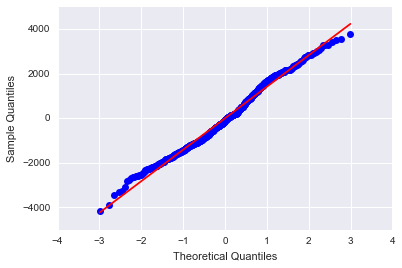

In [71]:
sm.qqplot(results.resid, line='r');

The residual follow the straight line, but deviate somewhat at the higher and lower quantiles. This indicates that the residuals are not perfectly normally distributed. Adding additional explanatory variables to the model may improve it.

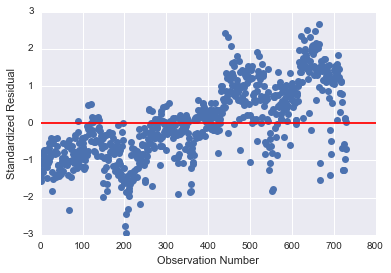

In [80]:
stdres=pandas.DataFrame(results.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number');

Interestingly, the residuals seem to vary with observation number, where lower observation numbers have lower residuals than higher ones. Observations with higher numbers occur later in time, which may indicate that the bike rental company is renting more bikes over time. This indicates that 'time' may be a candidate for another explanatory variable to add to the model.

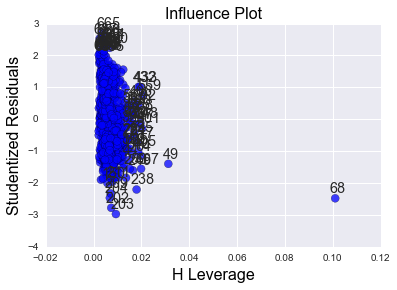

In [83]:
sm.graphics.influence_plot(results, size=8);

In [79]:
data.iloc[68,:]

instant                 69
dteday          2011-03-10
season                   1
yr                       0
mnth                     3
holiday                  0
weekday                  4
workingday               1
weathersit               3
temp              0.389091
atemp             0.385668
hum                      0
windspeed         0.261877
casual                  46
registered             577
cnt                    623
temp_c           -0.106294
windspeed_c      0.0713908
hum_c            -0.627894
weathersit_c             2
Name: 68, dtype: object

There are some outliers, but all but one do not influence the model much. Observation 68 (corresponding to 2011-03-10) is an outlier and has high leverage.